# Sports Training Performance Analysis

## Advanced Training Session Analytics
Deep dive analysis of training sessions including heart rate monitoring, speed analysis, endurance tracking, and technique assessment.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## 1. Training Data Analysis

In [2]:
# Load training dataset
training_df = pd.read_csv('sports_training_dataset.csv')
training_df['Date'] = pd.to_datetime(training_df['Date'])

print(f"Training Dataset Shape: {training_df.shape}")
print(f"\nColumns: {list(training_df.columns)}")
print(f"\nSample Data:")
training_df.head()

Training Dataset Shape: (10, 13)

Columns: ['Athlete_ID', 'Age', 'Gender', 'Sport_Type', 'Session_ID', 'Date', 'Session_Duration', 'Heart_Rate_Avg', 'Speed_Avg', 'Distance_Covered', 'Endurance_Score', 'Technique_Score', 'Performance_Level']

Sample Data:


,Athlete_ID,Age,Gender,Sport_Type,Session_ID,Date,Session_Duration,Heart_Rate_Avg,Speed_Avg,Distance_Covered,Endurance_Score,Technique_Score,Performance_Level
0,1,24,Male,Football,S001,2025-01-01,36,144,5.325258,12226,58.318450,63.013213,Average
1,2,21,Male,Basketball,S002,2025-01-02,38,146,9.744428,7152,93.631308,65.547092,Needs Improvement
2,3,22,Male,Basketball,S003,2025-01-03,53,147,9.828160,14147,84.880977,60.853961,Needs Improvement
3,4,24,Female,Basketball,S004,2025-01-04,30,135,9.041987,5585,92.277452,83.149500,Needs Improvement
4,5,20,Male,Basketball,S005,2025-01-05,73,134,6.523069,7943,90.267231,64.270133,Needs Improvement


## 2. Key Training Insights

In [3]:
# Training session insights
total_sessions = len(training_df)
unique_athletes = training_df['Athlete_ID'].nunique()
avg_session_duration = training_df['Session_Duration'].mean()
avg_heart_rate = training_df['Heart_Rate_Avg'].mean()
sports_in_training = training_df['Sport_Type'].nunique()

print("=== TRAINING SESSION ANALYTICS ===")
print(f"📊 Total Training Sessions: {total_sessions:,}")
print(f"🏃 Athletes in Training: {unique_athletes}")
print(f"⏱️ Average Session Duration: {avg_session_duration:.1f} minutes")
print(f"❤️ Average Heart Rate: {avg_heart_rate:.0f} bpm")
print(f"🏆 Sports in Training: {sports_in_training}")

# Performance level distribution
performance_dist = training_df['Performance_Level'].value_counts()
print(f"\n📈 Performance Level Distribution:")
for level, count in performance_dist.items():
    percentage = (count / total_sessions) * 100
    print(f"  {level}: {count} sessions ({percentage:.1f}%)")

=== TRAINING SESSION ANALYTICS ===
📊 Total Training Sessions: 10
🏃 Athletes in Training: 10
⏱️ Average Session Duration: 48.6 minutes
❤️ Average Heart Rate: 138 bpm
🏆 Sports in Training: 2

📈 Performance Level Distribution:
  Needs Improvement: 7 sessions (70.0%)
  Average: 3 sessions (30.0%)


## 3. Training Intensity Analysis

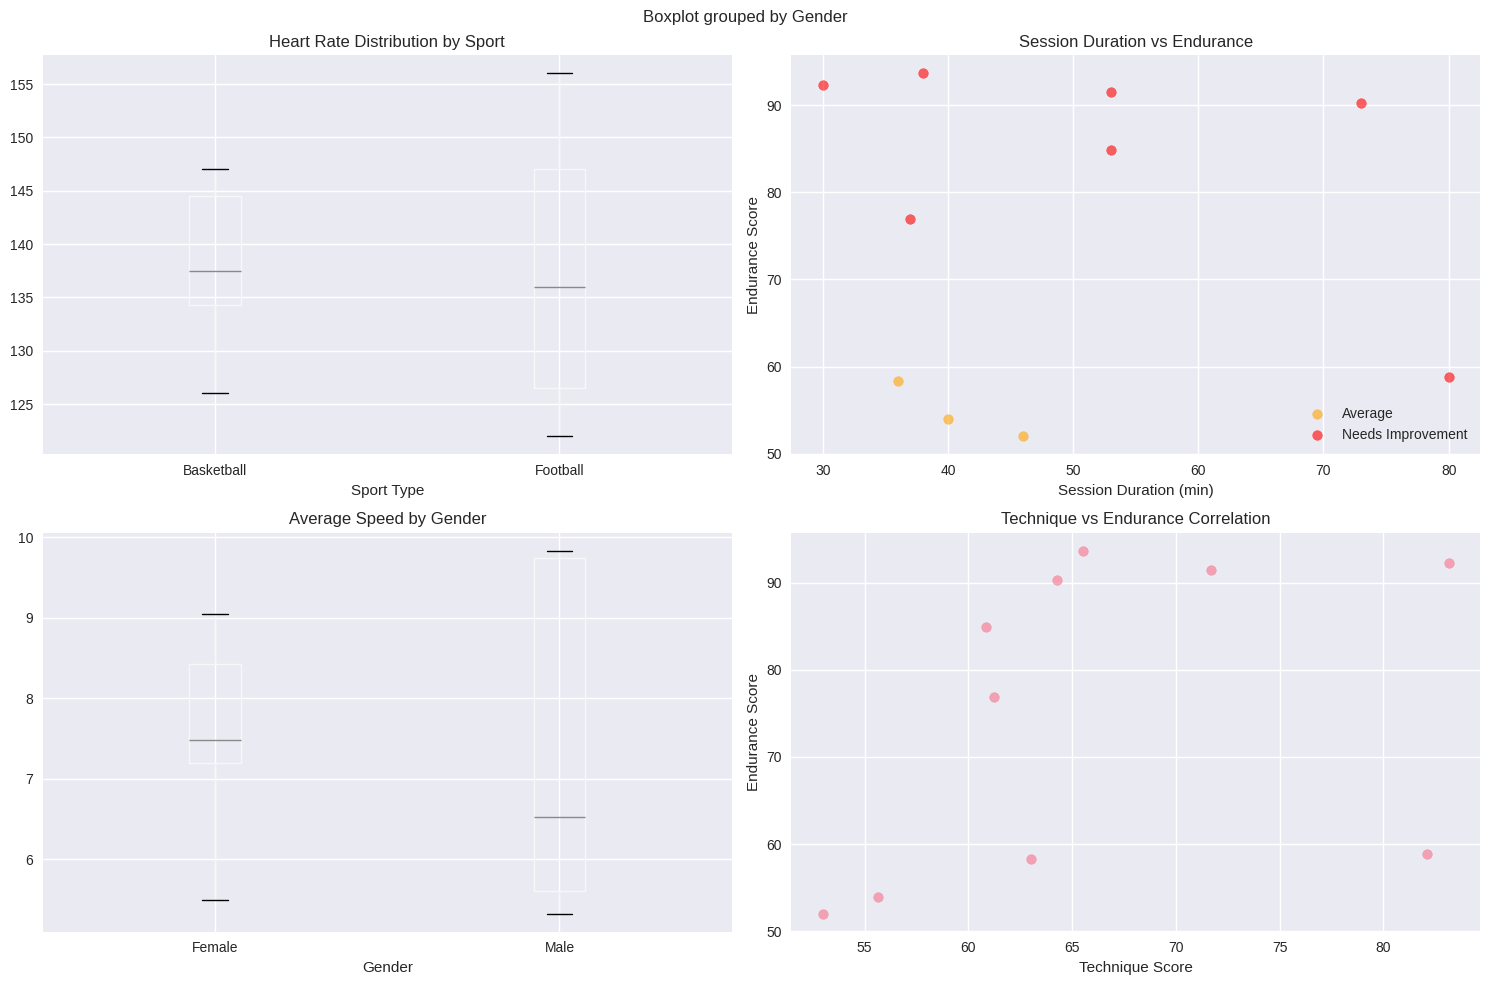


❤️ Heart Rate Training Zones:
  High Intensity: 5 sessions (50.0%)
  Moderate Intensity: 5 sessions (50.0%)


In [4]:
# Heart rate zones analysis
def categorize_heart_rate(hr):
    if hr < 120:
        return 'Low Intensity'
    elif hr < 140:
        return 'Moderate Intensity'
    elif hr < 160:
        return 'High Intensity'
    else:
        return 'Maximum Intensity'

training_df['HR_Zone'] = training_df['Heart_Rate_Avg'].apply(categorize_heart_rate)

# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Heart rate distribution by sport
training_df.boxplot(column='Heart_Rate_Avg', by='Sport_Type', ax=axes[0,0])
axes[0,0].set_title('Heart Rate Distribution by Sport')
axes[0,0].set_xlabel('Sport Type')

# Session duration vs performance
performance_colors = {'Excellent': 'green', 'Average': 'orange', 'Needs Improvement': 'red'}
for perf_level in training_df['Performance_Level'].unique():
    data = training_df[training_df['Performance_Level'] == perf_level]
    axes[0,1].scatter(data['Session_Duration'], data['Endurance_Score'], 
                     label=perf_level, alpha=0.6, 
                     color=performance_colors.get(perf_level, 'blue'))
axes[0,1].set_xlabel('Session Duration (min)')
axes[0,1].set_ylabel('Endurance Score')
axes[0,1].set_title('Session Duration vs Endurance')
axes[0,1].legend()

# Speed analysis by gender
training_df.boxplot(column='Speed_Avg', by='Gender', ax=axes[1,0])
axes[1,0].set_title('Average Speed by Gender')

# Technique vs Endurance correlation
axes[1,1].scatter(training_df['Technique_Score'], training_df['Endurance_Score'], alpha=0.6)
axes[1,1].set_xlabel('Technique Score')
axes[1,1].set_ylabel('Endurance Score')
axes[1,1].set_title('Technique vs Endurance Correlation')

plt.tight_layout()
plt.show()

# Heart rate zones distribution
hr_zone_dist = training_df['HR_Zone'].value_counts()
print(f"\n❤️ Heart Rate Training Zones:")
for zone, count in hr_zone_dist.items():
    print(f"  {zone}: {count} sessions ({count/len(training_df)*100:.1f}%)")

## 4. Performance Optimization Insights

In [5]:
# Calculate training efficiency score
training_df['Training_Efficiency'] = (
    (training_df['Endurance_Score'] * 0.4) +
    (training_df['Technique_Score'] * 0.4) +
    ((training_df['Distance_Covered'] / training_df['Session_Duration']) * 10 * 0.2)
)

# Top performers analysis
top_performers = training_df.nlargest(10, 'Training_Efficiency')
print("=== TOP 10 TRAINING PERFORMANCES ===")
print(top_performers[['Athlete_ID', 'Sport_Type', 'Training_Efficiency', 'Endurance_Score', 'Technique_Score']].to_string(index=False))

# Sport-specific insights
sport_analysis = training_df.groupby('Sport_Type').agg({
    'Heart_Rate_Avg': 'mean',
    'Speed_Avg': 'mean',
    'Endurance_Score': 'mean',
    'Technique_Score': 'mean',
    'Training_Efficiency': 'mean',
    'Session_Duration': 'mean'
}).round(2)

print(f"\n\n=== SPORT-SPECIFIC TRAINING METRICS ===")
print(sport_analysis)

# Age group performance analysis
training_df['Age_Group'] = pd.cut(training_df['Age'], bins=[0, 20, 23, 30], labels=['18-20', '21-23', '24+'])
age_performance = training_df.groupby('Age_Group')[['Endurance_Score', 'Technique_Score', 'Training_Efficiency']].mean()

print(f"\n\n=== PERFORMANCE BY AGE GROUP ===")
print(age_performance.round(2))

=== TOP 10 TRAINING PERFORMANCES ===
 Athlete_ID Sport_Type  Training_Efficiency  Endurance_Score  Technique_Score
          1   Football           727.754888        58.318450        63.013213
          6   Football           679.851746        76.905499        61.237380
          3 Basketball           592.143032        84.880977        60.853961
          4 Basketball           442.504114        92.277452        83.149500
          2 Basketball           440.092413        93.631308        65.547092
          9 Basketball           426.487843        58.819229        82.087879
         10   Football           383.006901        52.035228        52.982026
          7   Football           332.182534        91.484341        71.707843
          8 Basketball           294.897653        53.982163        55.636969
          5 Basketball           279.431384        90.267231        64.270133


=== SPORT-SPECIFIC TRAINING METRICS ===
            Heart_Rate_Avg  Speed_Avg  Endurance_Score  Techniq

## 5. Training Recommendations Engine

In [6]:
def generate_training_recommendations(athlete_data):
    """Generate training recommendations based on session data"""
    recommendations = []
    
    # Heart rate recommendations
    if athlete_data['Heart_Rate_Avg'] < 120:
        recommendations.append("💓 INTENSITY: Increase training intensity - heart rate too low")
    elif athlete_data['Heart_Rate_Avg'] > 170:
        recommendations.append("💓 INTENSITY: Reduce intensity - risk of overexertion")
    
    # Endurance recommendations
    if athlete_data['Endurance_Score'] < 60:
        recommendations.append("🏃 ENDURANCE: Focus on aerobic capacity building")
    elif athlete_data['Endurance_Score'] > 90:
        recommendations.append("🏃 ENDURANCE: Excellent - maintain current program")
    
    # Technique recommendations
    if athlete_data['Technique_Score'] < 60:
        recommendations.append("🎯 TECHNIQUE: Prioritize skill development sessions")
    elif athlete_data['Technique_Score'] > 85:
        recommendations.append("🎯 TECHNIQUE: Advanced - focus on competition preparation")
    
    # Session duration recommendations
    if athlete_data['Session_Duration'] < 30:
        recommendations.append("⏱️ DURATION: Extend session length for better adaptation")
    elif athlete_data['Session_Duration'] > 90:
        recommendations.append("⏱️ DURATION: Consider shorter, more intense sessions")
    
    # Performance level recommendations
    if athlete_data['Performance_Level'] == 'Needs Improvement':
        recommendations.append("📈 PERFORMANCE: Implement structured progression plan")
    
    return recommendations

# Generate recommendations for sample athletes
sample_sessions = training_df.sample(5)

print("=== PERSONALIZED TRAINING RECOMMENDATIONS ===")
for _, session in sample_sessions.iterrows():
    print(f"\n🏃 Athlete {session['Athlete_ID']} - {session['Sport_Type']} Session")
    print(f"Performance: {session['Performance_Level']} | HR: {session['Heart_Rate_Avg']:.0f} | Duration: {session['Session_Duration']:.0f}min")
    
    recommendations = generate_training_recommendations(session)
    for rec in recommendations:
        print(f"  • {rec}")

=== PERSONALIZED TRAINING RECOMMENDATIONS ===

🏃 Athlete 2 - Basketball Session
Performance: Needs Improvement | HR: 146 | Duration: 38min
  • 🏃 ENDURANCE: Excellent - maintain current program
  • 📈 PERFORMANCE: Implement structured progression plan

🏃 Athlete 4 - Basketball Session
Performance: Needs Improvement | HR: 135 | Duration: 30min
  • 🏃 ENDURANCE: Excellent - maintain current program
  • 📈 PERFORMANCE: Implement structured progression plan

🏃 Athlete 7 - Football Session
Performance: Needs Improvement | HR: 156 | Duration: 53min
  • 🏃 ENDURANCE: Excellent - maintain current program
  • 📈 PERFORMANCE: Implement structured progression plan

🏃 Athlete 5 - Basketball Session
Performance: Needs Improvement | HR: 134 | Duration: 73min
  • 🏃 ENDURANCE: Excellent - maintain current program
  • 📈 PERFORMANCE: Implement structured progression plan

🏃 Athlete 9 - Basketball Session
Performance: Needs Improvement | HR: 140 | Duration: 80min
  • 🏃 ENDURANCE: Focus on aerobic capacity buil

## 6. Training Load Management

=== TRAINING LOAD MANAGEMENT ===
High Training Load Threshold: 70.3
Athletes with High Weekly Load: 1


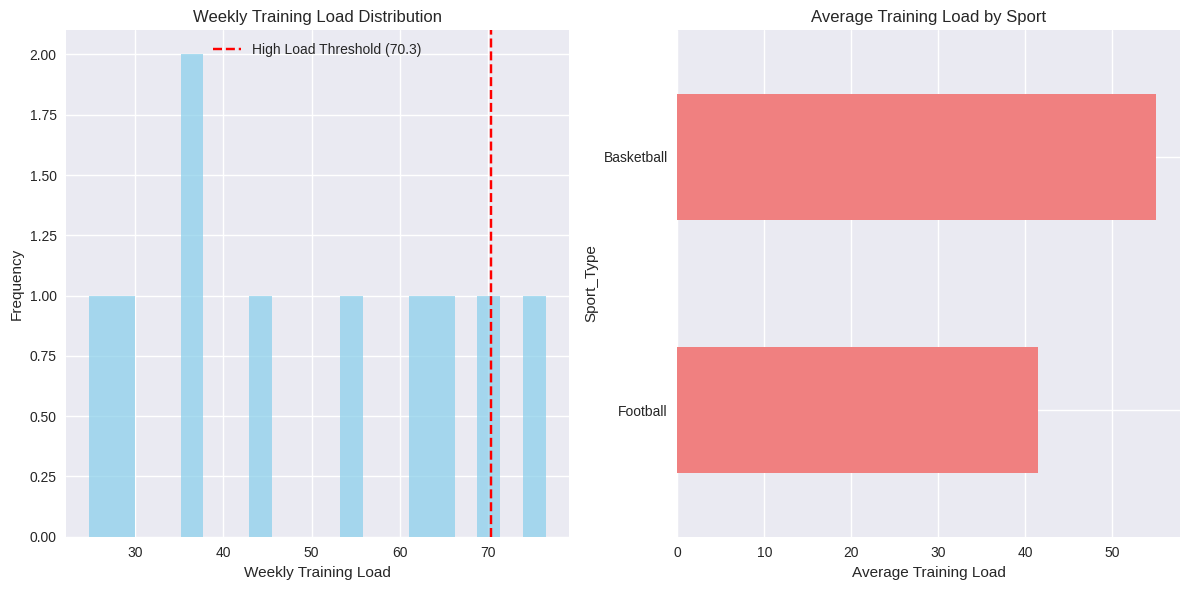


⚠️ Athletes requiring load management:
  Athlete 3: Weekly Load = 76.6


In [7]:
# Calculate training load metrics
training_df['Training_Load'] = (
    training_df['Session_Duration'] * 
    (training_df['Heart_Rate_Avg'] / 100) * 
    (training_df['Speed_Avg'] / 10)
)

# Weekly training load analysis
training_df['Week'] = training_df['Date'].dt.isocalendar().week
weekly_load = training_df.groupby(['Athlete_ID', 'Week'])['Training_Load'].sum().reset_index()

# Identify athletes with high training loads
high_load_threshold = weekly_load['Training_Load'].quantile(0.9)
high_load_athletes = weekly_load[weekly_load['Training_Load'] > high_load_threshold]

print(f"=== TRAINING LOAD MANAGEMENT ===")
print(f"High Training Load Threshold: {high_load_threshold:.1f}")
print(f"Athletes with High Weekly Load: {len(high_load_athletes)}")

# Visualize training load distribution
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(weekly_load['Training_Load'], bins=20, alpha=0.7, color='skyblue')
plt.axvline(high_load_threshold, color='red', linestyle='--', label=f'High Load Threshold ({high_load_threshold:.1f})')
plt.xlabel('Weekly Training Load')
plt.ylabel('Frequency')
plt.title('Weekly Training Load Distribution')
plt.legend()

plt.subplot(1, 2, 2)
sport_load = training_df.groupby('Sport_Type')['Training_Load'].mean().sort_values(ascending=True)
sport_load.plot(kind='barh', color='lightcoral')
plt.xlabel('Average Training Load')
plt.title('Average Training Load by Sport')

plt.tight_layout()
plt.show()

print(f"\n⚠️ Athletes requiring load management:")
for _, athlete in high_load_athletes.head(5).iterrows():
    print(f"  Athlete {athlete['Athlete_ID']}: Weekly Load = {athlete['Training_Load']:.1f}")